<a href="https://colab.research.google.com/github/The-Mechanic-3/Data-Driven-Aerospace/blob/Colab/Little_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is some test code to flesh out some ideas

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed
torch.manual_seed(42)

# Generate input and true output
t = torch.unsqueeze(torch.linspace(0, 1, 3600), dim=1)
y_true = 1.0 * torch.exp(-0.5*t) * torch.sin(10*torch.pi*t - 1.0*t)


# Train/validation split
t_train_np, t_val_np, y_train_np, y_val_np = train_test_split(
    t.numpy(), y_true.numpy(), test_size=0.2, random_state=42)

t_train = torch.tensor(t_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
t_val = torch.tensor(t_val_np, dtype=torch.float32)
y_val = torch.tensor(y_val_np, dtype=torch.float32)

# Improved model definition
model = nn.Sequential(
    nn.Linear(1, 128),
    nn.Tanh(),
    nn.Linear(128, 128),
    nn.Tanh(),
    nn.Linear(128, 1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
epochs = 2000
train_loss, val_loss = [], []

# Training loop
for epoch in range(epochs):
    model.train()
    y_pred_train = model(t_train)
    loss = loss_fn(y_pred_train, y_train)
    train_loss.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_val = model(t_val)
        val_loss.append(loss_fn(y_pred_val, y_val).item())

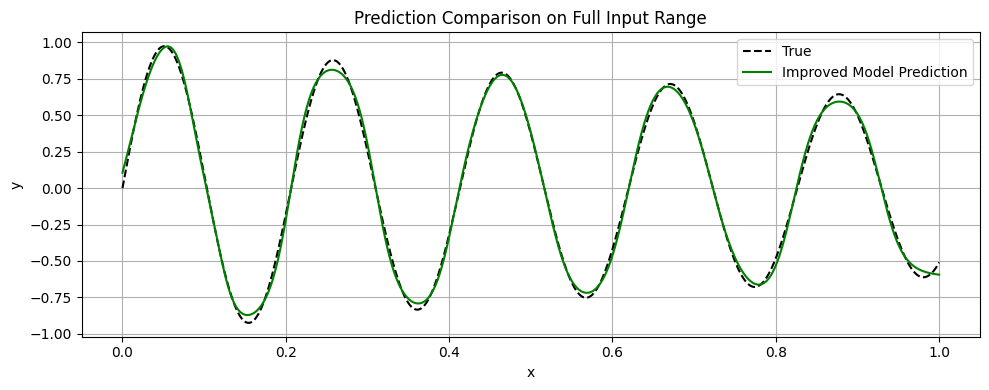

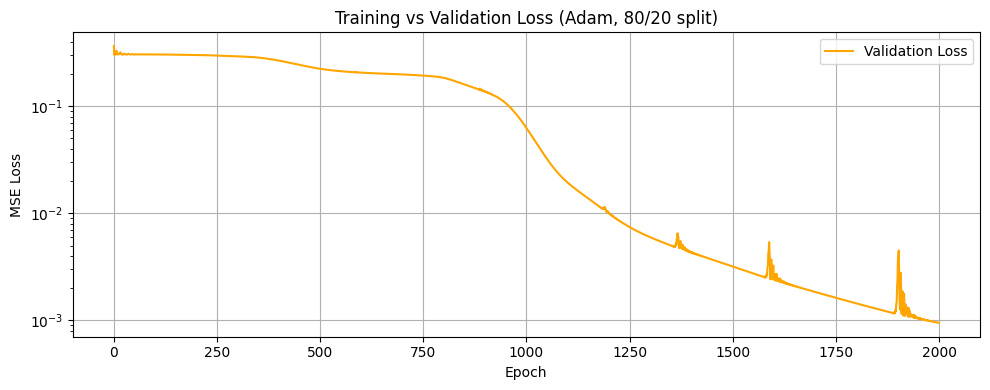

In [20]:
with torch.no_grad(): y_pred_full = model(t)

plt.figure(figsize=(10, 4))
plt.plot(t.numpy(), y_true.numpy(), label="True", linestyle="--", color="black")
plt.plot(t.numpy(), y_pred_full.numpy(), label="Improved Model Prediction", color="green")
plt.title("Prediction Comparison on Full Input Range")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 4))
plt.semilogy(val_loss, label="Validation Loss", color="orange")
plt.title("Training vs Validation Loss (Adam, 80/20 split)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Homework 4 - Feed-Forward Neural Network for Decaying Sinusoidal Signal

This is the code for the homework.

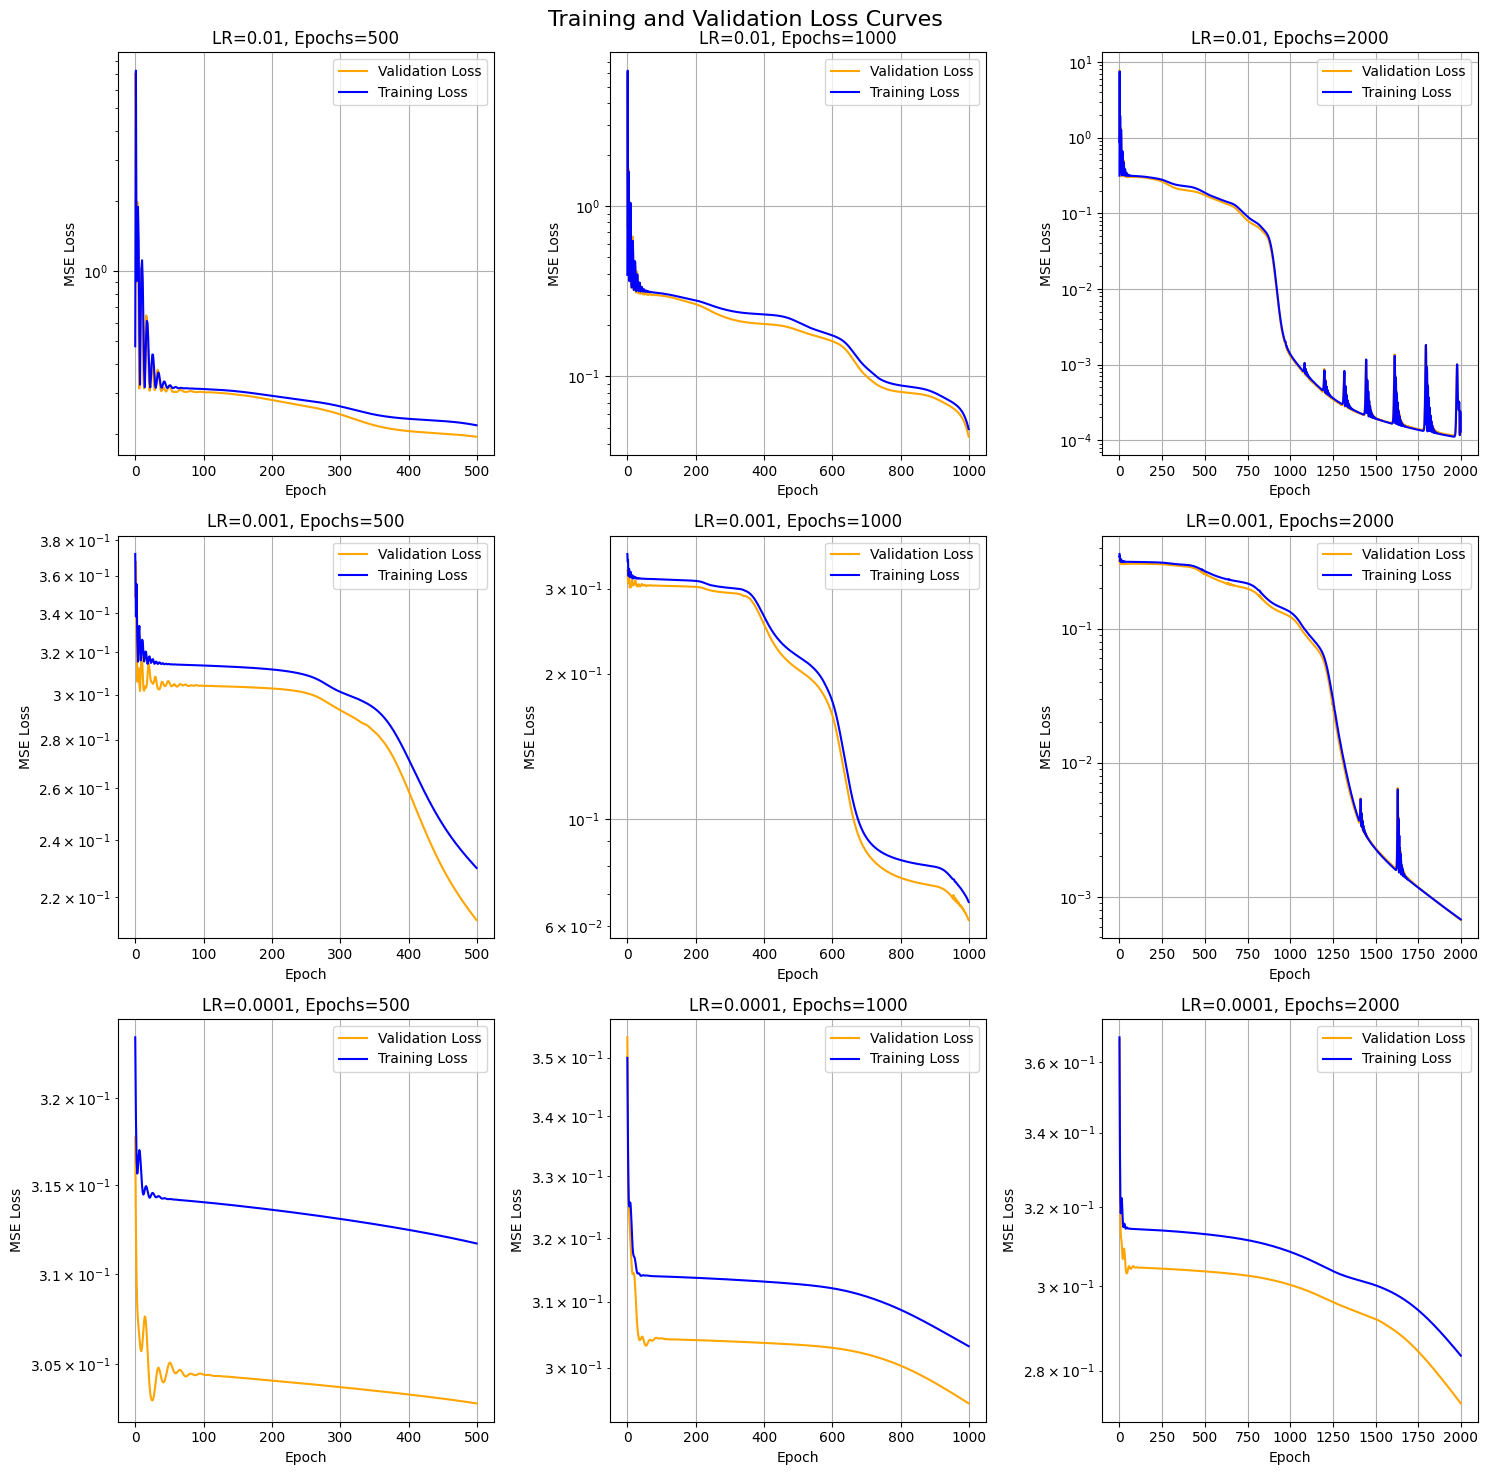

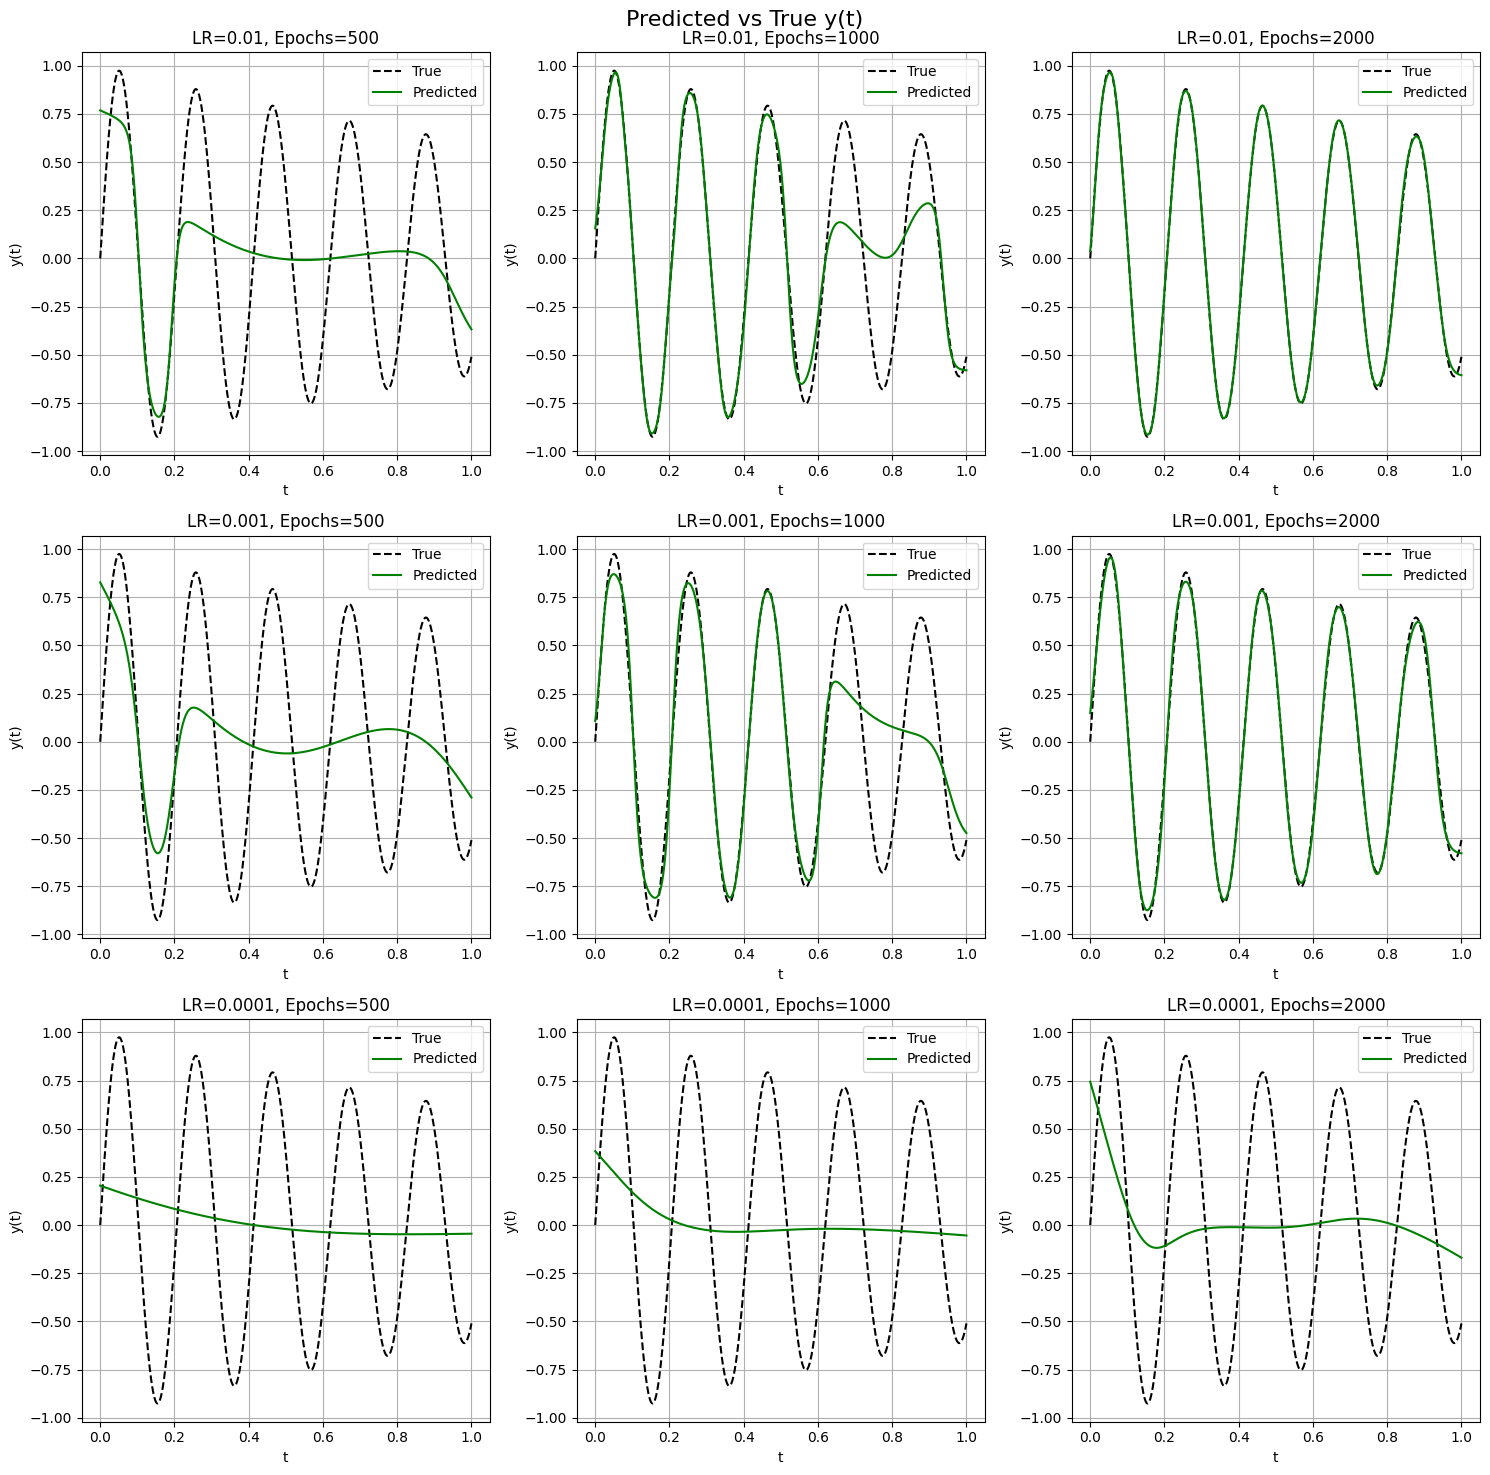

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed
torch.manual_seed(42)

# Generate input and true output
t = torch.unsqueeze(torch.linspace(0, 1, 3600), dim=1)
y_true = 1.0 * torch.exp(-0.5*t) * torch.sin(10*torch.pi*t - 1.0*t)

# Train/validation split
t_train_np, t_val_np, y_train_np, y_val_np = train_test_split(
    t.numpy(), y_true.numpy(), test_size=0.2, random_state=42)

t_train = torch.tensor(t_train_np, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
t_val = torch.tensor(t_val_np, dtype=torch.float32)
y_val = torch.tensor(y_val_np, dtype=torch.float32)

# Model definition
model = nn.Sequential(
    nn.Linear(1, 128),
    nn.Tanh(),
    nn.Linear(128, 128),
    nn.Tanh(),
    nn.Linear(128, 1)
)


# Configurations
learning_rates = [1e-2, 1e-3, 1e-4]
epochs_list = [500, 1000, 2000]

# Store results
results = {}

# Iterate through configurations
for lr in learning_rates:
    for epochs in epochs_list:
        # Initialize model and optimizer
        model = nn.Sequential(
            nn.Linear(1, 128),
            nn.Tanh(),
            nn.Linear(128, 128),
            nn.Tanh(),
            nn.Linear(128, 1)
        )
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        loss_fn = nn.MSELoss()

        # Training loop
        train_loss, val_loss = [], []
        for epoch in range(epochs):
            model.train()
            y_pred_train = model(t_train)
            loss = loss_fn(y_pred_train, y_train)
            train_loss.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                y_pred_val = model(t_val)
                val_loss.append(loss_fn(y_pred_val, y_val).item())

        # Store results
        results[(lr, epochs)] = {
            'train_loss': train_loss,
            'val_loss': val_loss,
            'model': model  # Store the trained model
        }

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Training and Validation Loss Curves', fontsize=16)

for i, lr in enumerate(learning_rates):
    for j, epochs in enumerate(epochs_list):
        ax = axes[i, j]
        result = results[(lr, epochs)]
        ax.semilogy(result['val_loss'], label="Validation Loss", color="orange")
        ax.semilogy(result['train_loss'], label="Training Loss", color="blue")
        ax.set_title(f'LR={lr}, Epochs={epochs}')
        ax.set_xlabel("Epoch")
        ax.set_ylabel("MSE Loss")
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()


# Plotting predicted vs true y(t)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Predicted vs True y(t)', fontsize=16)

for i, lr in enumerate(learning_rates):
    for j, epochs in enumerate(epochs_list):
        ax = axes[i, j]
        result = results[(lr, epochs)]
        model = result['model']
        with torch.no_grad():
            y_pred_full = model(t)
        ax.plot(t.numpy(), y_true.numpy(), label="True", linestyle="--", color="black")
        ax.plot(t.numpy(), y_pred_full.numpy(), label="Predicted", color="green")
        ax.set_title(f'LR={lr}, Epochs={epochs}')
        ax.set_xlabel("t")
        ax.set_ylabel("y(t)")
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd

# ... (Your existing code for training and storing results) ...

# Create a list to store the data for the table
table_data = []

# Iterate through results and calculate final MSE
for (lr, epochs), result in results.items():
    final_train_loss = result['train_loss'][-1]  # Get the last value of train_loss
    final_val_loss = result['val_loss'][-1]  # Get the last value of val_loss
    table_data.append([lr, epochs, final_train_loss, final_val_loss])

# Create a pandas DataFrame for the table
df = pd.DataFrame(table_data, columns=['Learning Rate', 'Epochs', 'Final Train MSE', 'Final Validation MSE'])

# Display the table
display(df)

,Learning Rate,Epochs,Final Train MSE,Final Validation MSE
0,0.0100,500,0.217408,0.194093
1,0.0100,1000,0.048980,0.044193
2,0.0100,2000,0.000129,0.000122
3,0.0010,500,0.230071,0.212437
4,0.0010,1000,0.067229,0.061673
5,0.0010,2000,0.000678,0.000671
6,0.0001,500,0.311711,0.302817
7,0.0001,1000,0.303194,0.294687
8,0.0001,2000,0.283444,0.272619




    Which configuration performed best and why?

    The configuration with the learning rate of 0.0100
    and the epoch size of 2000 perforemd the best out
    of all the other configurations. This is due to the
    faster rate at which the data is trained and the
    amount of times the model is trained being the
    highest.

    How did learning rate and training duration affect convergence?

    According to the data collected, the higher the
    learning rate, the more accurate the model is to
    the actual. Also, as the epochs increase, the
    accuracy of the model increases.

    Did any configuration overfit or underfit?

    No configuration overfit, but the configuration
    with the learning rate of 0.0001 and the epoch size
    of 500 was extremely underfit. This was due to the
    extremely small learning rate. as the epochs
    increased the curve fit got better but was still
    extremely underfit.
